# Import, options

In [1]:
import numpy, matplotlib, pandas, scanpy

In [2]:
matplotlib.rcParams.update({'font.size':20, 'xtick.labelsize':20, 'ytick.labelsize':20, 
                            'axes.grid' : True, 'grid.alpha': 0.5, 'grid.linestyle' : ':',
                            'figure.figsize':(8, 5), 'svg.fonttype' : 'none'})

In [3]:
file_directory = "/Users/kja11/OneDrive - Menntaský/PostDoc_Hypothermia/in_silico/Python/"

# Data Downloads

In [4]:
#data mouse_NPC
mouse_NPC_df = pandas.read_csv(file_directory+'1) input/mNPC_all_detected_genes_DEseq.csv',
                               sep = ',')
print(mouse_NPC_df.shape, '\n', mouse_NPC_df.columns)

#calculate mean of counts for 32°C
mouse_NPC_df = mouse_NPC_df.assign(mean_32C = (mouse_NPC_df[['32_degrees', '32_degrees.1', 
                                                             '32_degrees.2', '32_degrees.3']].mean(axis=1))) 

mouse_NPC_df = mouse_NPC_df[['gene', 'mean_32C']]
mouse_NPC_df

(16062, 15) 
 Index(['Row.names', 'baseMean', 'log2FoldChange', 'lfcSE', 'stat', 'pvalue',
       'padj', 'gene', '37_degrees', '37_degrees.1', '37_degrees.2',
       '32_degrees', '32_degrees.1', '32_degrees.2', '32_degrees.3'],
      dtype='object')


,gene,mean_32C
0,Cirbp,5638.825457
1,Xbp1,665.980661
2,Hspa8,44456.348720
3,Dnaja3,1194.744413
4,Tra2a,579.433941
...,...,...
16057,Pex2,1690.168500
16058,Ank3,852.794025
16059,Hmgcl,1075.309725
16060,Arl6ip5,1358.161000


In [5]:
# DL List of the SP1 candidat repressors
SP1_repressors = pandas.read_csv(file_directory+'1) input/SP1_repressors.csv', sep = ',')
SP1_repressors = SP1_repressors[['Gene Symbol']]
SP1_repressors

,Gene Symbol
0,STXBP1
1,LRRC26
2,MUC15
3,GATAD2A
4,MUT
...,...
490,CNTNAP2
491,hsa-mir-5693
492,hsa-mir-300
493,ZNF816-ZNF321P


In [6]:
# DL list human and mouse orthologs
list_hum_mous = pandas.read_csv(file_directory+'human_mouse_1to1_orthologs.csv', sep = ',')
list_hum_mous

,human,mouse
0,A1BG,A1bg
1,A1CF,A1cf
2,A2LD1,A2ld1
3,A2M,A2m
4,A4GALT,A4galt
...,...,...
15542,ZYG11A,Zyg11a
15543,ZYG11B,Zyg11b
15544,ZYX,Zyx
15545,ZZEF1,Zzef1


# Transform to have mice gene symbols 

In [7]:
#rename to be able to merge the two df
SP1_repressors = SP1_repressors.rename(columns = {'Gene Symbol' : 'human'})

# merge the SP1 df with the hum_mouse to have mouse gene symbols
SP1_repressors = SP1_repressors.merge(list_hum_mous)
print(SP1_repressors)

SP1_repressors = SP1_repressors[['mouse']]
SP1_repressors = SP1_repressors.rename(columns = {'mouse' : 'gene'})
SP1_repressors

       human     mouse
0     STXBP1    Stxbp1
1     LRRC26    Lrrc26
2      MUC15     Muc15
3    GATAD2A   Gatad2a
4        MUT       Mut
..       ...       ...
324    WNT11     Wnt11
325   R3HDM1    R3hdm1
326     RGMB      Rgmb
327  C9orf78  BC005624
328  CNTNAP2   Cntnap2

[329 rows x 2 columns]


,gene
0,Stxbp1
1,Lrrc26
2,Muc15
3,Gatad2a
4,Mut
...,...
324,Wnt11
325,R3hdm1
326,Rgmb
327,BC005624


In [34]:
# Merge the two tables and only keep the sp1_repressors in the RNAseq
df_mNPC_sp1rep = pandas.merge(mouse_NPC_df, SP1_repressors, on= 'gene')

print(f'number of Sp1 repressors in the RNAseq is {len(df_mNPC_sp1rep)} on a total of {len(SP1_repressors)}')
print(f'{len(SP1_repressors) - len(df_mNPC_sp1rep)} repressors are not in the RNAseq')

df_mNPC_sp1rep.head()

number of Sp1 repressors in the RNAseq is 267 on a total of 329
62 repressors are not in the RNAseq


,gene,mean_32C
0,Creld2,770.013759
1,Tfdp2,3233.756622
2,Noc3l,775.568243
3,Pias3,1505.760415
4,Mns1,862.590235


In [9]:
#control values did not change.
print(mouse_NPC_df[mouse_NPC_df['gene'] == 'Tfdp2'])
print(df_mNPC_sp1rep[df_mNPC_sp1rep['gene'] == 'Tfdp2'])

     gene     mean_32C
40  Tfdp2  3233.756622
    gene     mean_32C
1  Tfdp2  3233.756622


# UMAP from Leiden algorithm

In [35]:
# Save the file to .csv
df_mNPC_sp1rep = df_mNPC_sp1rep.set_index('gene')

df_mNPC_sp1rep.to_csv(file_directory+'1) input/from_output/df_mNPC_sp1rep.tsv',sep = "\t")
df_mNPC_sp1rep.head()

,mean_32C
gene,
Creld2,770.013759
Tfdp2,3233.756622
Noc3l,775.568243
Pias3,1505.760415
Mns1,862.590235


In [12]:
# Open the saved file with scanpy
adata  = scanpy.read_csv(file_directory+'1) input/from_output/df_mNPC_sp1rep.tsv', delimiter='\t')

#adata for anotated data
print(adata.shape)
adata

(267, 1)


AnnData object with n_obs × n_vars = 267 × 1

C:\Users\kja11\anaconda3\Lib\site-packages\umap\umap_.py:1393: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


C:\Users\kja11\anaconda3\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


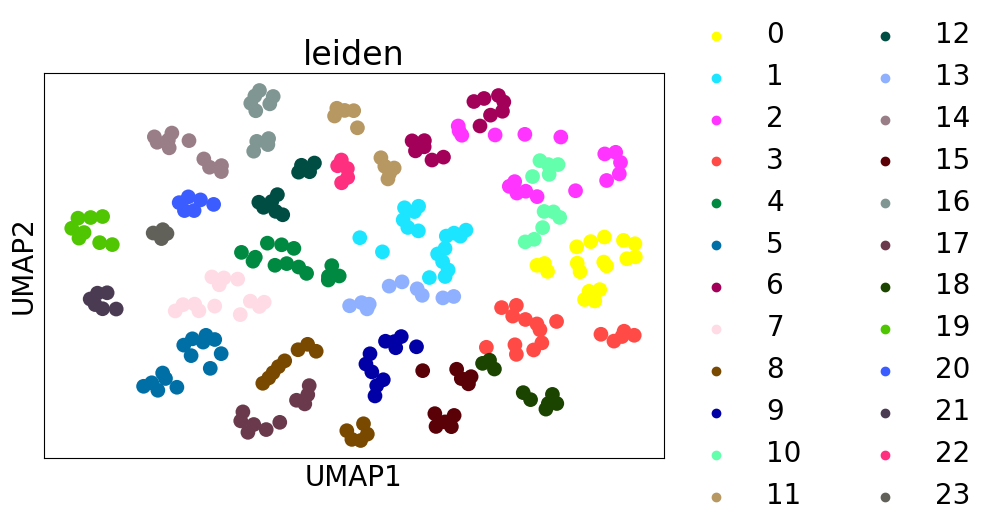

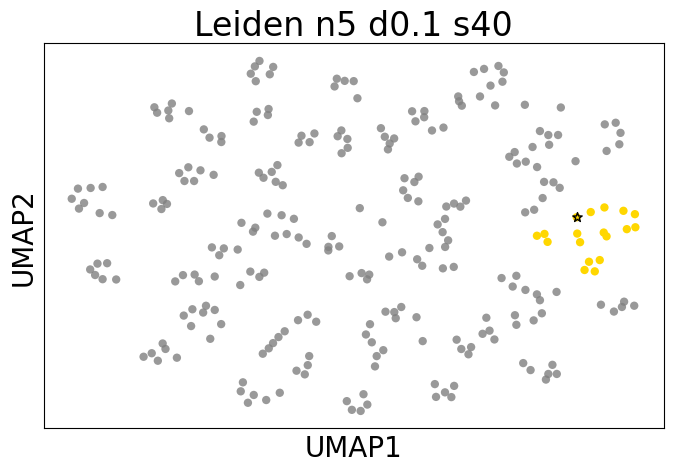

CPU times: total: 1.27 s
Wall time: 2.68 s


In [33]:
%%time
nei = 5
dist = 0.1
spre = 40

# Perform neighborhood analysis using the specified number of neighbors and principal components
scanpy.pp.neighbors(adata, n_neighbors=nei, n_pcs=10)
# Apply the Leiden algorithm
scanpy.tl.leiden(adata)
# Perform PAGA (Partition-based Graph Abstraction) analysis and plot without displaying it (plot=False)
scanpy.tl.paga(adata)
scanpy.pl.paga(adata, plot=False)
# Perform UMAP
scanpy.tl.umap(adata, min_dist=dist, spread=spre, init_pos='paga')
# Generate UMAP plot with coloring based on the Leiden clustering
scanpy.pl.umap(adata, color='leiden', save='_all')

# dealing with colors
umap0 = adata.obsm['X_umap'][:, 0]
umap1 = adata.obsm['X_umap'][:, 1]

group1x = []; group1y = [] #Smyd5_group
othersx = []; othersy = [] #Others

for i in range(len(adata.obs.index)):
    gene = adata.obs.index[i]
    label = adata.obs.loc[gene, 'leiden']
    x = adata.obsm['X_umap'][i, 0] 
    y = adata.obsm['X_umap'][i, 1]

    if label == adata.obs.loc['Smyd5', 'leiden']:
        group1x.append(x); group1y.append(y)
    else:
        othersx.append(x); othersy.append(y)

matplotlib.pyplot.scatter(group1x, group1y, c='gold', alpha=1, edgecolors='none')
matplotlib.pyplot.scatter(othersx, othersy, c='gray', alpha=0.8, edgecolors='none')

# location of Smyd5
position1 = adata.obsm['X_umap'][adata.obs.index.get_loc('Smyd5'), :]
matplotlib.pyplot.scatter(position1[0], position1[1], s=50, color='gold', edgecolors='black', marker='*')

matplotlib.pyplot.title('Leiden n{} d{} s{}'.format(nei, dist, spre))
matplotlib.pyplot.xlabel('UMAP1')
matplotlib.pyplot.ylabel('UMAP2')
matplotlib.pyplot.xticks([])
matplotlib.pyplot.yticks([])
matplotlib.pyplot.show()

In [30]:
# yellow is group 0. Get all the gene in group 0
group_0_elements = adata.obs[adata.obs['leiden'] == '0'].index

print(f'genes in Smyd5 group: {group_0_elements}')

f = open(file_directory+'3) output/gene_in_smyd5_group.txt', 'w')
for element in group_0_elements:
  f.write('{}\n'.format(element))

f.close()

genes in Smyd5 group: Index(['Pias3', 'Rad51ap1', 'Csf1', 'Dctn5', 'Gtf2e1', 'Wdr61', 'Abhd8',
       'R3hdm1', 'Map4k5', 'Ahsa2', 'Atm', 'Usp38', 'Pdcd10', 'Dctn3',
       'Sh3glb2', 'Irf2bp1', 'Smyd5', 'Arfgap1'],
      dtype='object')
